### 1.Create a study guide for all the supervised learning models we have gone over. Include information about how the algorithms work, how they are evaluated, and any other information you deem necessary. Use your own words. Do NOT copy mine or that of articles we have read.


#### Supervised Learning

How it works:
    
    This algorithm consist of a target / outcome variable (or dependent variable) which is to be predicted from a given set of predictors (independent variables). Using these set of variables, we generate a function that map inputs to desired outputs. The training process continues until the model achieves a desired level of accuracy on the training data. Examples of Supervised Learning: Regression, Decision Tree, Random Forest, KNN, Logistic Regression etc.
    
     supervised learning algorithm we predict y with the maximum accuracy for a given new input x
     All data is labeled and the algorithms learn to predict the output from the input data.
     
     in supervised learning we divided data in two different steps
     1) training set
     2) testing set
     

#### Different Types of Supervised Learning models


 *Regression- In regression, a single output value is produced using training data.
    
 *Classification- It involves grouping the data into classes. 

 *Naive Bayesian Model. 
    
 *Random Forest Model. 

 *Neural Networks. 
    
 *Support Vector Machines.


#### The supervised algorithms 

    Linear Regression

    Logistic Regression

    Naïve-Bayes

    K-Nearest Neighbors (KNN) 

    Ensembling is another type of supervised learning

### 2.Do the same as question 1 except for unsupervised learning models. Something that is necessary for many models is determining number, so specify how you determine the number of clusters for example. Apply this concept to any other algorithms it is relevant for.

#### What is unsupervised machine learning?

Unsupervised learning is a type of machine learning algorithm that brings order to the dataset and makes sense of data.

Unsupervised machine learning algorithms are used to group unstructured data according to its similarities and distinct patterns in the dataset.

All data is unlabeled and the algorithms learn to inherent structure from the input data.

#### How does an unsupervised ML algorithm work?

The unsupervised algorithm works with unlabeled data. 
unsupervised learning applies two major techniques - clustering and dimensionality reduction.

#### Clustering - Exploration of Data
it is used for exploration of data

Grouping unlabeled examples is called clustering.

If the examples are labeled, then clustering becomes classification.

#### Dimensionality Reduction - Making Data Digestible



---in this technique the process is to getting rid of the unnecessary information.

---for cleaning data Dimentionality Reduction technique is used.

---It reduces the processes to decreases the complexity of the data

--unsupervised machine learning operations


#### --unsupervised machine learning operations

k-means Clustering - Data Mining

Hidden Markov Model - Pattern Recognition, Natural Language Processing, Data Analytics

DBSCAN Clustering - Customer Service Personalization, Recommender engines

Principal component analysis (PCA)

Singular value decomposition (SVD) 

#### we described different methods for choosing the optimal number of clusters in a data set. 

These methods include

the elbow method

X-means clustering(like k mean clustering)

the silhouette

the gap statistic methods

Cross-validation

#### Dimensionality Reduction Algorithum

In [184]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


X = df_pca[[0,1]]
Y = df_pca['Clusters']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# Logistic Regression
clr = LogisticRegression(random_state=42).fit(X_train, y_train)

#predict
y_predicted= clr.predict(X_test)
print(y_predicted)

# Print the accuracy
print("test accuracy: " + str(clr.score(X_test, y_test)))

# Print the accuracy
print("train accuracy: " + str(clr.score(X_train, y_train)))

[4 1 0 ... 0 3 0]
test accuracy: 0.9754224270353302
train accuracy: 0.9634507737899243


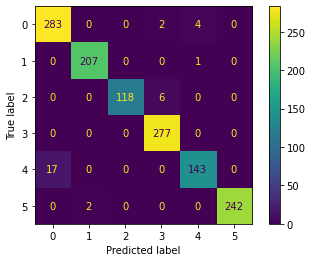

In [185]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report
plot_confusion_matrix(clr, X_test, y_test)

#### Singular value decomposition (SVD) 

In [186]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1)

X_train_svd=svd.fit_transform(X_train)
X_test_svd=svd.fit_transform(X_test)

clr = LogisticRegression(random_state=42).fit(X_train_svd, y_train)
print(clr.score(X_train_svd,y_train))

clr = LogisticRegression(random_state=42).fit(X_test_svd, y_test)
print(clr.score(X_test_svd,y_test))

0.42607836680935135
0.6129032258064516


### 3.Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-data . How are you handling nulls? What process(es) are you using to encode and normalize the data?

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [189]:
data = pd.read_csv('E-commerce.csv')
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [190]:
# checking null values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [191]:
data.dropna(axis = 0, inplace = True)
print(data.shape)   #removing the null values

(406829, 8)


In [192]:
data = data[data['Quantity']>=0]
data = data[data['UnitPrice']>=0]

print(data.shape)

(397924, 8)


In [193]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [194]:
data['TotalQuantity'] = data['Quantity']*data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalQuantity
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [195]:
#Now we will look at the details of the countries through which most of the orders were placed
print(data[['InvoiceNo','Country']].groupby('Country').count().sort_values("InvoiceNo",ascending = False))

                      InvoiceNo
Country                        
United Kingdom           354345
Germany                    9042
France                     8342
EIRE                       7238
Spain                      2485
Netherlands                2363
Belgium                    2031
Switzerland                1842
Portugal                   1462
Australia                  1185
Norway                     1072
Italy                       758
Channel Islands             748
Finland                     685
Cyprus                      614
Sweden                      451
Austria                     398
Denmark                     380
Poland                      330
Japan                       321
Israel                      248
Unspecified                 244
Singapore                   222
Iceland                     182
USA                         179
Canada                      151
Greece                      145
Malta                       112
United Arab Emirates         68
European

In [196]:
data[data['TotalQuantity']==data['TotalQuantity'].max()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalQuantity
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,168469.6


In [197]:
items = data['Description'].value_counts().head()
print(items)

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
Name: Description, dtype: int64


In [198]:
print(data[['InvoiceNo','Country','CustomerID','TotalQuantity']].sort_values('TotalQuantity',ascending = False).head(15))

       InvoiceNo         Country  CustomerID  TotalQuantity
540421    581483  United Kingdom     16446.0      168469.60
61619     541431  United Kingdom     12346.0       77183.60
222680    556444  United Kingdom     15098.0       38970.00
173382    551697  United Kingdom     16029.0        8142.75
348325    567423  United Kingdom     17450.0        7144.72
160546    550461  United Kingdom     15749.0        6539.40
52711     540815  United Kingdom     15749.0        6539.40
421601    573003     Netherlands     14646.0        4992.00
52709     540815  United Kingdom     15749.0        4921.50
160542    550461  United Kingdom     15749.0        4632.00
52772     540818  United Kingdom     15749.0        4522.50
244419    558526  United Kingdom     17949.0        4401.00
160544    550461  United Kingdom     15749.0        4254.50
291249    562439  United Kingdom     12931.0        4176.00
422351    573077          France     12536.0        4161.06


# RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behaviour to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

RECENCY (R): Days since last purchase

FREQUENCY (F): Total number of purchases

MONETARY VALUE (M): Total money this customer spent. We will create those 3 customer attributes for each customer.

Recency

To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

In [199]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Date'] = data['InvoiceDate'].apply(lambda x: x.date())
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalQuantity,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01


In [200]:
data['Month']=data['InvoiceDate'].apply(lambda x:x.month)
data['Year']=data['InvoiceDate'].apply(lambda x:x.year)
data=data.sort_values(by=['Year','Month'])

mmap={1:'Jan11',2:'Feb11',3:'Mar11',4:'Apr11', 5:'May11', 6:'Jun11', 7:'Jul11',8:'Aug11',9:'Sep11',10:'Oct11',11:'Nov11',12:'Dec11'}
data['Month_name']=data['Month'].map(mmap)

In [201]:
def my(x):
    Month=x[0]
    Year=x[1]
    
    if Year==2010:
        Month='Dec10'
        return Month
    else:
        return Month

In [202]:
data['Month_name']=data[['Month_name','Year']].apply(my, axis=1)

In [203]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalQuantity,Date,Month,Year,Month_name
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,12,2010,Dec10
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,Dec10
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,12,2010,Dec10
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,Dec10
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,12,2010,Dec10


Total Transaction's monthly

In [204]:
monthly=data.groupby(['Year','Month','Month_name']).sum()
monthly.head()

Quantity  UnitPrice   CustomerID  TotalQuantity
Year Month Month_name                                                 
2010 12    Dec10         312280  81935.610  406240953.0     572713.890
2011 1     Jan11         349147  66964.990  321904509.0     569445.040
     2     Feb11         265638  63185.760  305225091.0     447137.350
     3     Mar11         348544  88563.100  412680258.0     595500.760
     4     Apr11         292225  79005.481  345952584.0     469200.361

In [205]:
#recency dataframe
recency_df = data.groupby(by='CustomerID', as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head(5)

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [206]:
import datetime as dt
current = dt.date(2021,12,1)
print(current)

2021-12-01


In [207]:
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (current - x).days)
recency_df.drop('LastPurchaseDate',axis = 1,inplace=True)
recency_df.head(5)

,CustomerID,Recency
0,12346.0,3970
1,12347.0,3647
2,12348.0,3720
3,12349.0,3663
4,12350.0,3955


Frequency

Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [208]:
# .copy== it only creates a new variable that shares the reference of the original object.
temp = data.copy()
temp.drop_duplicates(['InvoiceNo','CustomerID'],keep='first',inplace=True)
frequency_df = temp.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


Monetary

Monetary attribute answers the question: How much money did the customer spent over time?

To do that, first, we will create a new column total cost to have the total price per invoice.

In [209]:
monetary_df = data.groupby(by = 'CustomerID',as_index=False).agg({'TotalQuantity':'sum'})
monetary_df.columns = ['CustomerID','TotalQuanity']
monetary_df.head(5)

,CustomerID,TotalQuanity
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


Create RFM Table

In [210]:
rfm_df = recency_df.merge(frequency_df,on='CustomerID').merge(monetary_df,on='CustomerID')
rfm_df.set_index('CustomerID',inplace=True)
rfm_df.head(5)

,Recency,Frequency,TotalQuanity
CustomerID,,,
12346.0,3970,1,77183.60
12347.0,3647,7,4310.00
12348.0,3720,4,1797.24
12349.0,3663,1,1757.55
12350.0,3955,1,334.40


In [211]:
features = rfm_df.columns
rfm_df.shape

(4339, 3)

RFM Table Visualisation

Now we will look at the correlation between the the Recency, Frequency and Monetary part of the RFM table which will be an integral part of customer segmentation

               Recency  Frequency  TotalQuanity
Recency       1.000000  -0.260459     -0.122190
Frequency    -0.260459   1.000000      0.554094
TotalQuanity -0.122190   0.554094      1.000000


<AxesSubplot:>

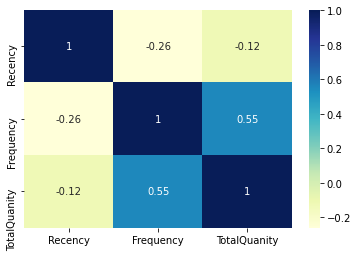

In [212]:
print(rfm_df.corr())
sns.heatmap(rfm_df.corr(),cmap="YlGnBu",annot=True)

Power transforms are a family of parametric, monotonic transformations that are applied to make data more Gaussian-like. This is useful for modeling issues related to heteroscedasticity (non-constant variance), or other situations where normality is desired.

In [213]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
rfm_df = pd.DataFrame(pt.fit_transform(rfm_df))
rfm_df.columns = features
rfm_df.head()

C:\Users\sachn\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3237: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


,Recency,Frequency,TotalQuanity
0,0.0,-1.158092,3.193082
1,0.0,1.202204,1.377477
2,0.0,0.661012,0.745038
3,0.0,-1.158092,0.728345
4,0.0,-1.158092,-0.592290


Conclusion

To gain even further insight into customer behavior, we can dig deeper in the relationship between RFM variables.

RFM model can be used in conjunction with certain predictive models like K-means clustering, Logistic Regression and Recommendation Engines to produce better informative results on customer behavior.

We will go for K-means since it has been widely used for Market Segmentation and it offers the advantage of being simple to implement.

# PCA

Applying PCA to reduce the the dimensions and the correlation between Frequency and Monetary features.

In [214]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
rfm_scaled = sc.fit_transform(rfm_df)
rfm_scaled

array([[ 0.        , -1.15809198,  3.19308246],
       [ 0.        ,  1.20220365,  1.37747719],
       [ 0.        ,  0.66101158,  0.74503797],
       ...,
       [ 0.        , -0.19547892, -1.13700823],
       [ 0.        ,  1.75054386,  0.858842  ],
       [ 0.        ,  0.3275373 ,  0.76148119]])

In [215]:
from sklearn.decomposition import PCA
pca = PCA()
pca_tranformed_data = pca.fit_transform(rfm_scaled)

In [216]:
pca.components_

array([[-0.        , -0.70710678, -0.70710678],
       [ 0.        ,  0.70710678, -0.70710678],
       [ 1.        ,  0.        ,  0.        ]])

In [217]:
pca.explained_variance_

array([1.7869312 , 0.21352984, 0.        ])

In [218]:
var_exp = pca.explained_variance_ratio_
var_exp

array([0.89325969, 0.10674031, 0.        ])

# Model Training

In [219]:
X = rfm_df.copy()
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(df_pca)
df_pca.head(5)

,0,1
0,-1.438956,-3.076745
1,-1.824110,-0.123937
2,-0.994227,-0.059416
3,0.303877,-1.333913
4,1.237707,-0.400083


### 4.Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?


# K-Means Clustering

In [220]:
X = df_pca.copy()

In [226]:
from sklearn.cluster import KMeans 

cluster_range = range(1, 15)
cluster_errors = []
cluster_sil_scores = []

for num in cluster_range: 
    clusters = KMeans(num, n_init = 100,init='k-means++',random_state=0)
    clusters.fit(X)
    # capture the cluster lables
    labels = clusters.labels_  
    # capture the centroids
    centroids = clusters.cluster_centers_ 
    # capture the intertia
    cluster_errors.append( clusters.inertia_ )    
clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,8678.000000
1,2,3167.406531
2,3,2006.354232
3,4,1574.253188
4,5,1182.757573
5,6,1001.370729
6,7,858.942916
7,8,750.744688
8,9,666.428165
9,10,582.988508


Text(0, 0.5, 'error')

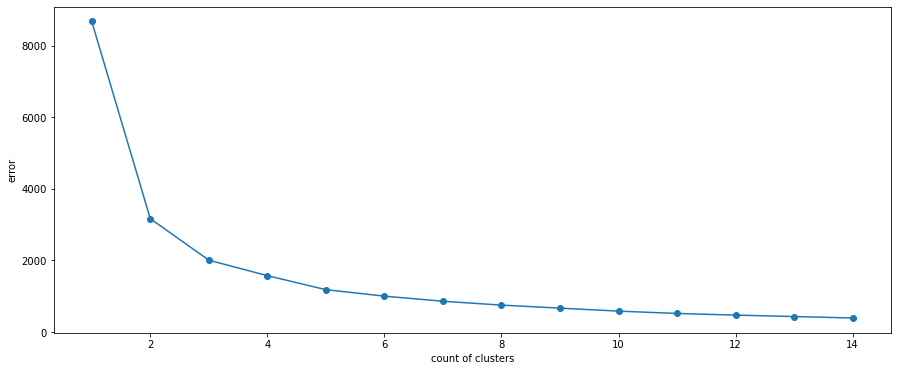

In [156]:
plt.figure(figsize=(15,6))
plt.plot(clusters_df["num_clusters"],clusters_df["cluster_errors"],marker = 'o')
plt.xlabel('count of clusters')
plt.ylabel('error')

In [157]:
from sklearn.metrics import silhouette_samples, silhouette_score
for num in range(2,16):
    clusters = KMeans(n_clusters=num,random_state=0)
    labels = clusters.fit_predict(df_pca)
    
    sil_avg = silhouette_score(df_pca, labels)
    print('For',num,'The Silhouette Score is =',sil_avg)

For 2 The Silhouette Score is = 0.5316173538263714
For 3 The Silhouette Score is = 0.4693803387603819
For 4 The Silhouette Score is = 0.44898330826905647
For 5 The Silhouette Score is = 0.43620408303781916
For 6 The Silhouette Score is = 0.42830129932398614
For 7 The Silhouette Score is = 0.435518037687719
For 8 The Silhouette Score is = 0.43932270523485933
For 9 The Silhouette Score is = 0.44482480679312464
For 10 The Silhouette Score is = 0.4373032413660648
For 11 The Silhouette Score is = 0.4439230102906327
For 12 The Silhouette Score is = 0.4413805303543545
For 13 The Silhouette Score is = 0.43678789059650036
For 14 The Silhouette Score is = 0.443971421874202
For 15 The Silhouette Score is = 0.4436569457463185


Inferences

We observe from the elbow plot a sharp bend after the number of clusters increase by 2. Silhoutte Score is also the highest for 2 clusters.

But, there is also a significant reduce in cluster error as number of clusters increase from 2 to 6 and after 6, the reduction is not much.

So, we will choose n_clusters = 6 to properly segment our customers.

In [158]:
kmeans = KMeans(n_clusters = 6)
kmeans = kmeans.fit(df_pca)
labels = kmeans.predict(df_pca)
centroids = kmeans.cluster_centers_

print(labels)
print()
print('Cluster Centers')
print(centroids)

[2 2 3 ... 4 3 0]

Cluster Centers
[[-0.26450202 -0.00624455]
 [ 1.83518174  0.21909488]
 [-2.37814639 -0.06800714]
 [-1.25951317  0.13617576]
 [ 0.49972413  0.40625753]
 [ 1.07056582 -0.56722356]]


In [159]:
df_pca['Clusters'] = labels
df_pca.head()

,0,1,Clusters
0,-1.438956,-3.076745,2
1,-1.824110,-0.123937,2
2,-0.994227,-0.059416,3
3,0.303877,-1.333913,5
4,1.237707,-0.400083,5


In [160]:
df_pca['Clusters'].value_counts()

0    964
3    924
5    812
1    691
4    534
2    414
Name: Clusters, dtype: int64

In [161]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
X = df_pca[[0,1]]
Y = df_pca['Clusters']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

# instantiate the model
dc=DecisionTreeClassifier()
#knn=KNeighborsClassifier(1)
# train a Gaussian Naive Bayes classifier on the training set
#from sklearn.naive_bayes import GaussianNB
#gnb = GaussianNB()


m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)

confussion matrix
[[285   0   1   0   3   0]
 [  0 207   0   0   0   1]
 [  0   0 122   2   0   0]
 [  0   0   2 275   0   0]
 [  1   1   0   0 158   0]
 [  0   0   0   0   0 244]]


In [162]:
from sklearn.metrics import accuracy_score
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100)


Accuracy of DecisionTreeClassifier: 99.15514592933948


In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dt_predicted))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       289
           1       1.00      1.00      1.00       208
           2       0.98      0.98      0.98       124
           3       0.99      0.99      0.99       277
           4       0.98      0.99      0.98       160
           5       1.00      1.00      1.00       244

    accuracy                           0.99      1302
   macro avg       0.99      0.99      0.99      1302
weighted avg       0.99      0.99      0.99      1302



# Conclusion

We saw that using classification models like DecisionTree we predicted the clusters for customers using RFM dataset as independent variables and Cluster as the target variable. The clusters predicted by the classification models perfectly aligns with K-Means clustering. So, we can conclude that our clusters are correct.

 this database providing details on purchases made on an E-commerce platform over a period of one year. Each entry in the dataset describes the purchase of a product, by a particular customer and at a given date.

the analysis was the customer segmentation part. The main way to go around with this procces is to use the RFM (Recency, Frequency, Monetory) table to sort the customer in the groups. After creating the RFM table I used K-Means clustering (Elbow curve and Silhoutte scores) in order to create 6 clusters in which the customers should be Segmented. After each of the customers were segmented into their respective groups. I used model DecisionTree in order the cross the accuracy of the clustering which resulted in an accuracy score 0.99 Hence, I conclude the customer segmentation was done which effective methods and high accuracy.

### 5.Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

# Hierarchical

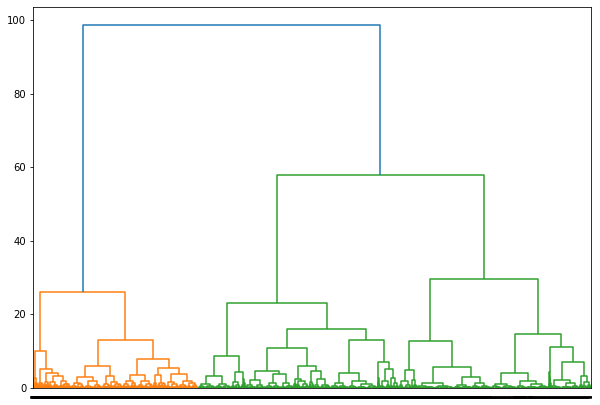

In [165]:
from scipy.cluster.hierarchy import dendrogram, linkage
X = df_pca[[0,1]]
Y = df_pca['Clusters']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

linked = linkage(X,'ward')
plt.figure(figsize=(10,7))

dendro = dendrogram(linked, labels=list(Y))
plt.show()

# Agglomerative Clustering

In [166]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean',linkage='ward')
cluster.fit_predict(X)

array([0, 2, 2, ..., 5, 2, 0], dtype=int64)

In [169]:
from sklearn.linear_model import LogisticRegression
#Standardize
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

# Logistic Regression
clr = LogisticRegression(random_state=42).fit(X_train, y_train)

#predict
y_predicted= clr.predict(X_test)
print(y_predicted)

# Print the accuracy
print("test accuracy: " + str(clr.score(X_test, y_test)))

# Print the accuracy
print("train accuracy: " + str(clr.score(X_train, y_train)))

[4 1 0 ... 0 3 0]
test accuracy: 0.9754224270353302
train accuracy: 0.9634507737899243


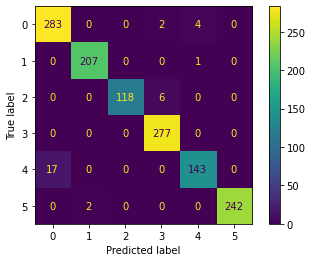

In [170]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report
plot_confusion_matrix(clr, X_test, y_test)

### 6.Compare the results of 4 and 5. Which approach do you think is best? Why?


we have analysed Customer data and performed Hierarchical Clustering using Agglomerative Clustering Algorithm. This kind of cluster analysis helps design better customer acquisition strategies and helps in business growth.

I conclude the customer segmentation using (K-Means Clustering) was done which effective methods and high accuracy rather than Hierarchicalclustering.